In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from proj1_helpers import *
from implementations import * 
import os
%load_ext autoreload
%autoreload 2

In [2]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)
labels_feature = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", dtype=str, max_rows=1)[2:]

In [3]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [4]:
# Subset feature replacemnet of DET_mass_MMC by median of defined values
ss0_tX, ss0_y = replace_undef_feat(ss0_tX,ss0_y,method = 'median')
ss1_tX, ss1_y = replace_undef_feat(ss1_tX,ss1_y,method = 'median')
ss2_tX, ss2_y = replace_undef_feat(ss2_tX,ss2_y,method = 'median')
ss3_tX, ss3_y = replace_undef_feat(ss3_tX,ss3_y,method = 'median')

ss0_tX_outliers, ss0_y_outliers = outliers_suppresion(ss0_tX, ss0_y, 3)
ss1_tX_outliers, ss1_y_outliers = outliers_suppresion(ss1_tX, ss1_y, 3)
ss2_tX_outliers, ss2_y_outliers = outliers_suppresion(ss2_tX, ss2_y, 3)
ss3_tX_outliers, ss3_y_outliers = outliers_suppresion(ss3_tX, ss3_y, 3)



size of the dataset with (99913, 18) and without (94109, 18) the outliers
Number of sample suppressed ouside 3 std: 5804
size of the dataset with (77544, 22) and without (70577, 22) the outliers
Number of sample suppressed ouside 3 std: 6967
size of the dataset with (50379, 29) and without (43060, 29) the outliers
Number of sample suppressed ouside 3 std: 7319
size of the dataset with (22164, 29) and without (18922, 29) the outliers
Number of sample suppressed ouside 3 std: 3242


In [5]:
ss_tX = ss3_tX_outliers
ss_y = ss3_y_outliers


Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


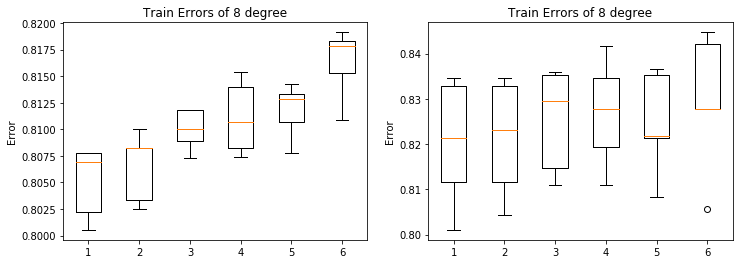

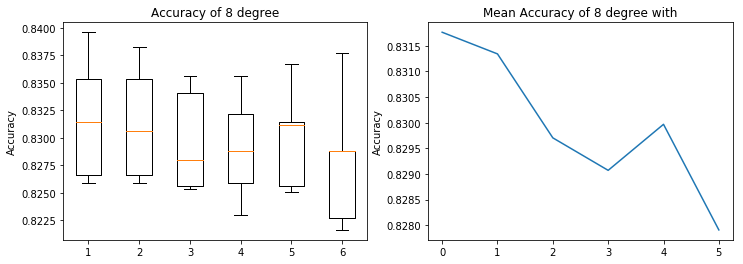

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


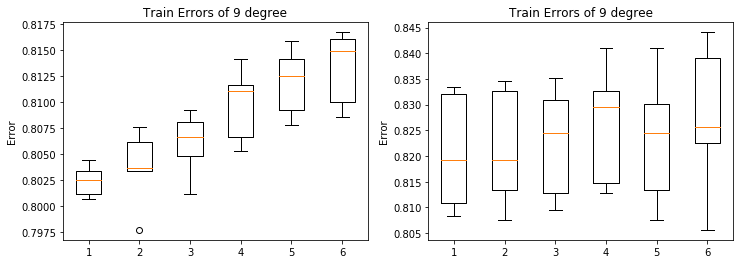

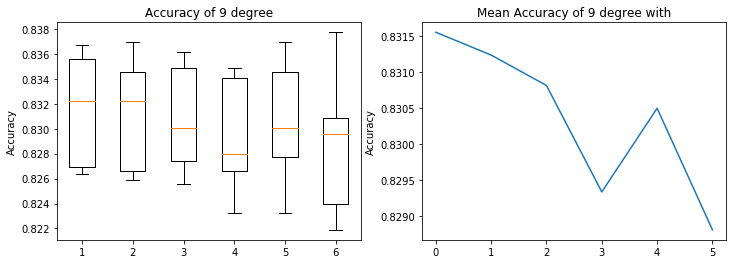

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


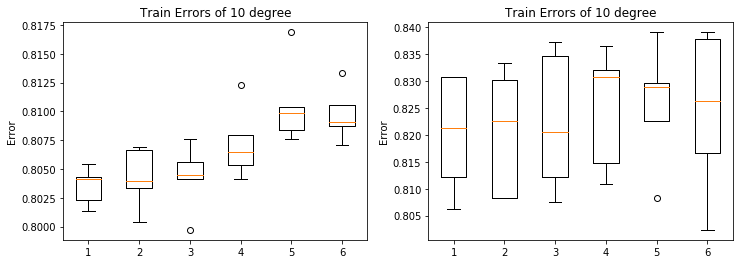

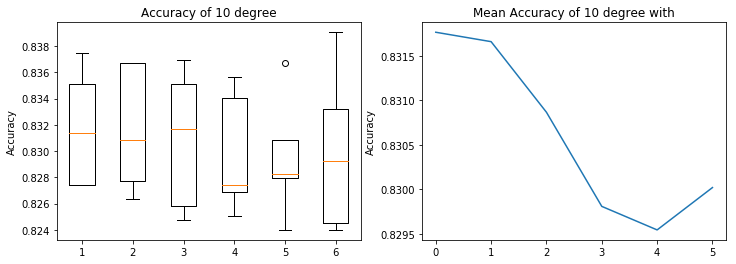

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


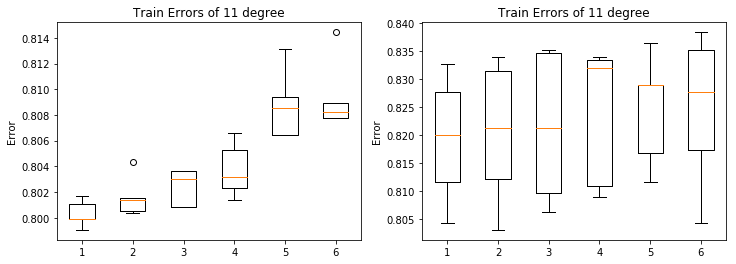

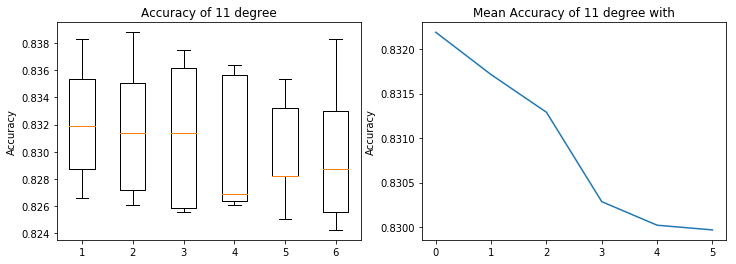

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


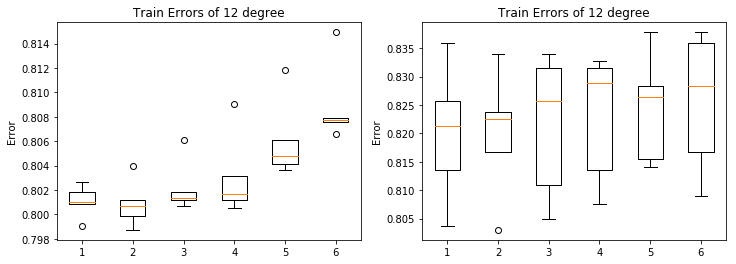

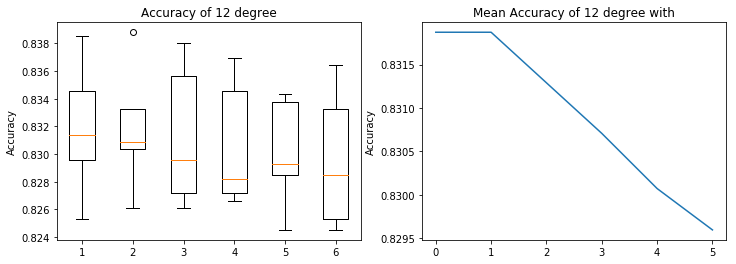

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


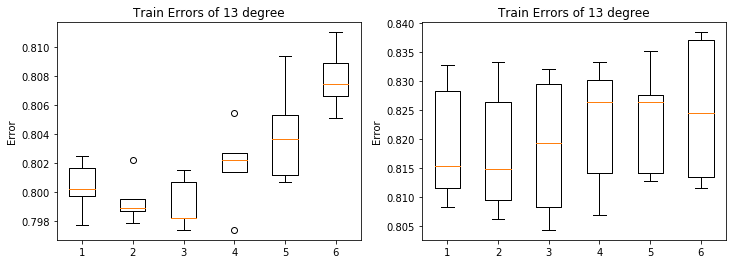

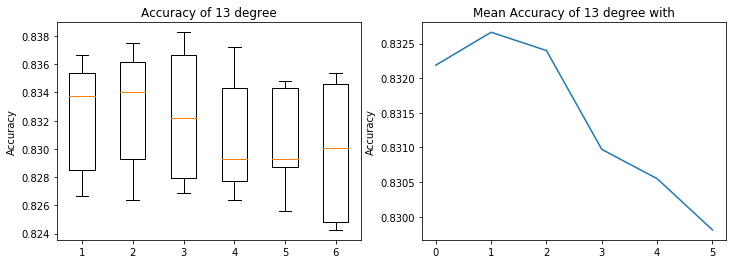

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


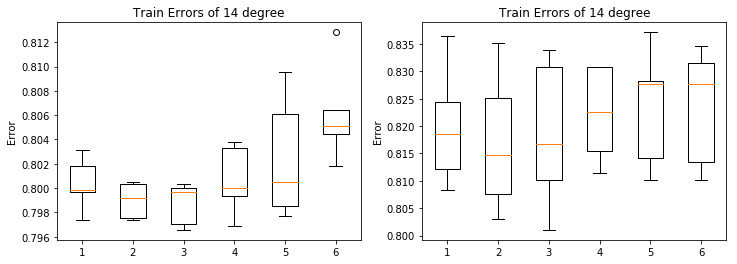

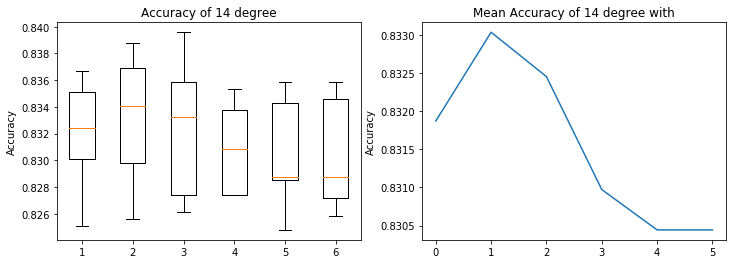

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


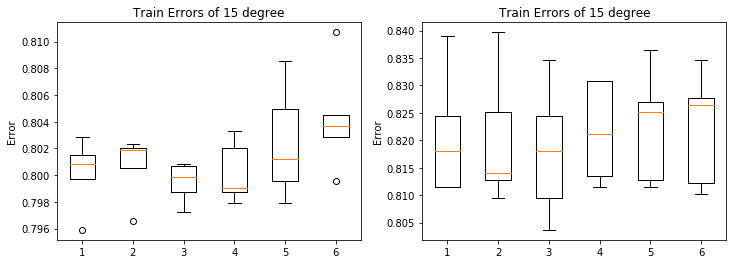

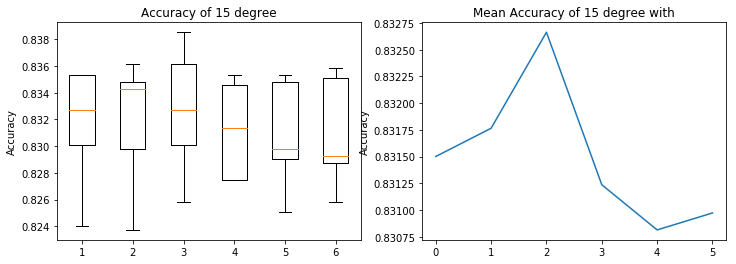

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


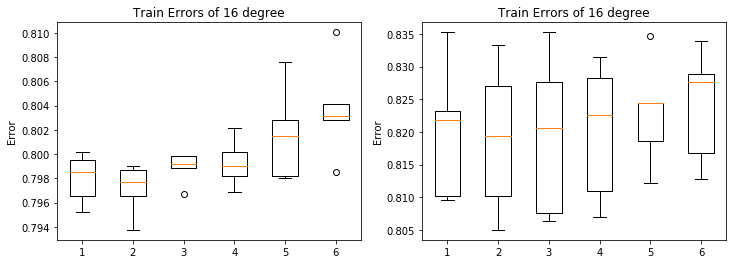

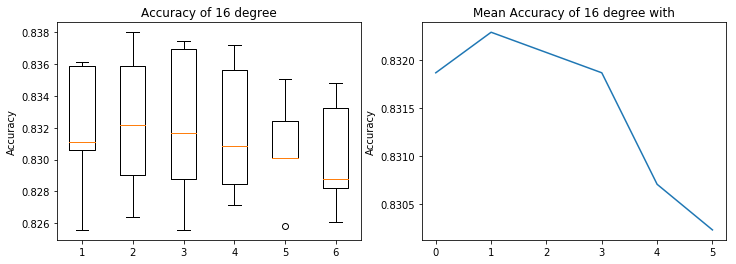

In [8]:
lambdas = np.logspace(-12, -7, 6)
degrees = np.linspace(8,16,9, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)
    
    

Deleted features for subset 0 : DER_pt_h
Deleted features for subset 1 : ['DER_pt_h' 'PRI_jet_leading_pt' 'PRI_jet_all_pt']
Deleted features for subset 2 : ['PRI_met_sumet' 'PRI_jet_leading_pt' 'PRI_jet_all_pt']
Deleted features for subset 3 : ['DER_sum_pt' 'PRI_met_sumet' 'PRI_jet_leading_pt']
Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


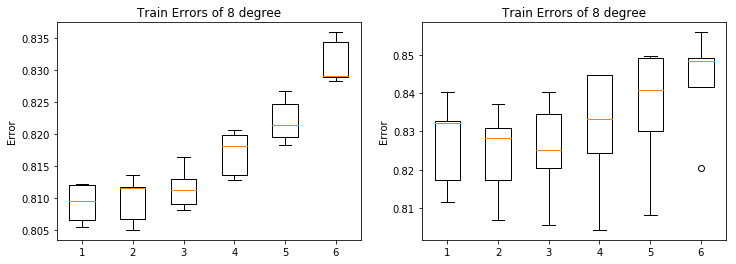

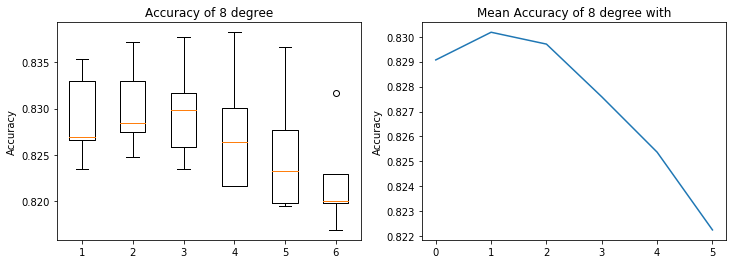

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


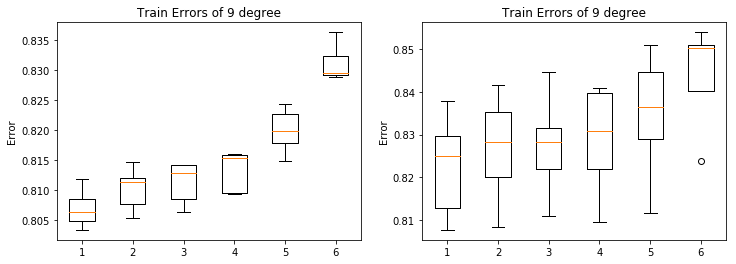

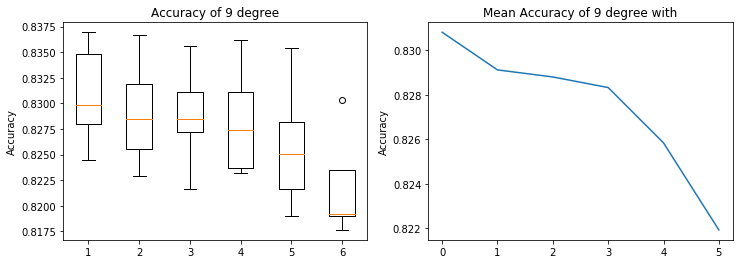

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


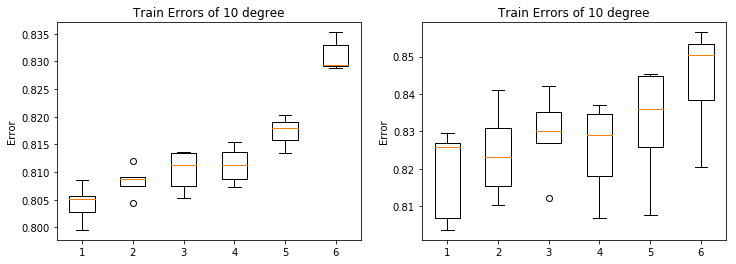

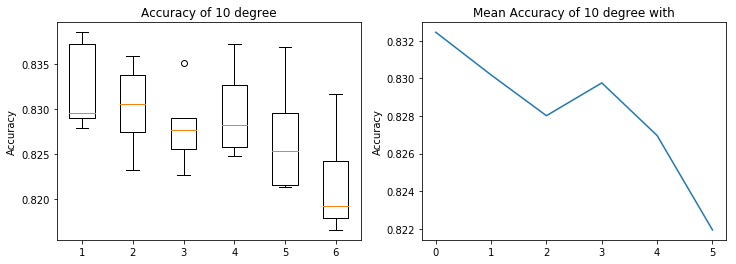

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


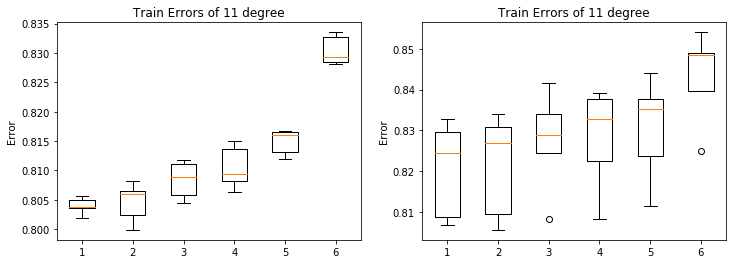

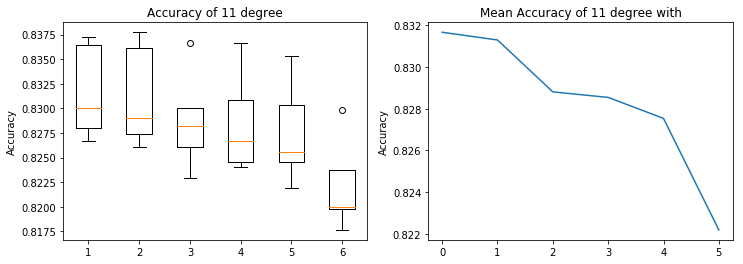

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


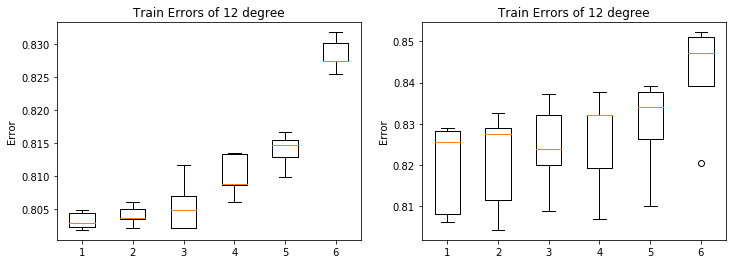

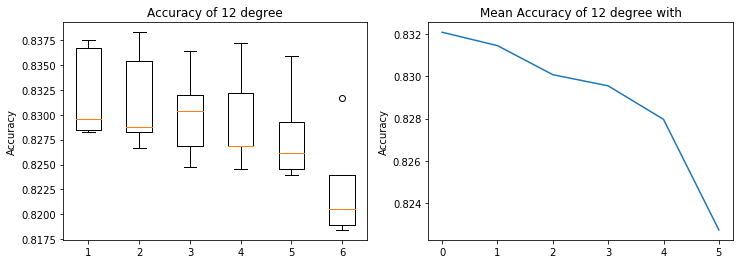

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


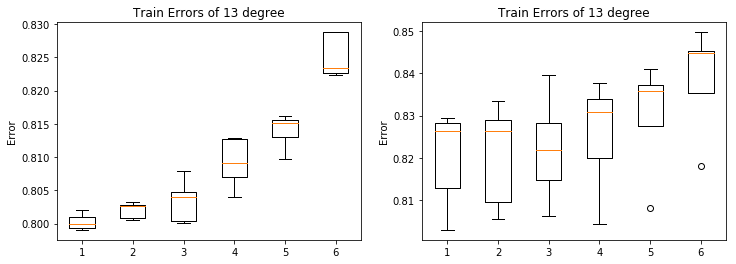

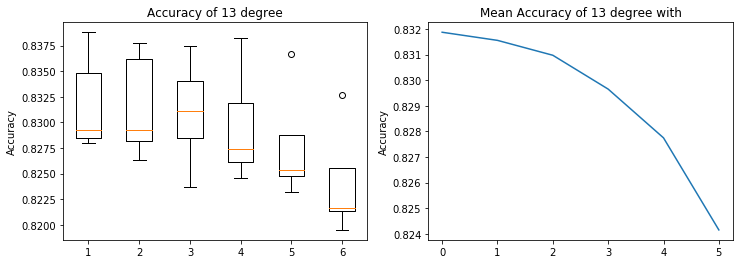

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


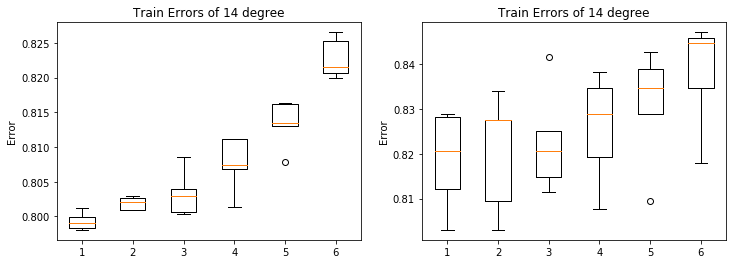

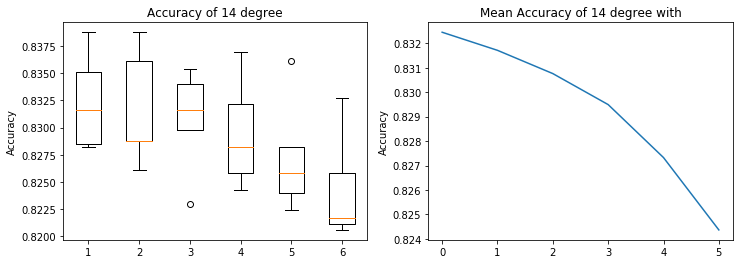

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


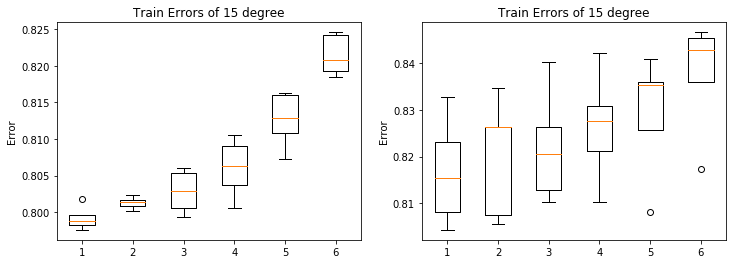

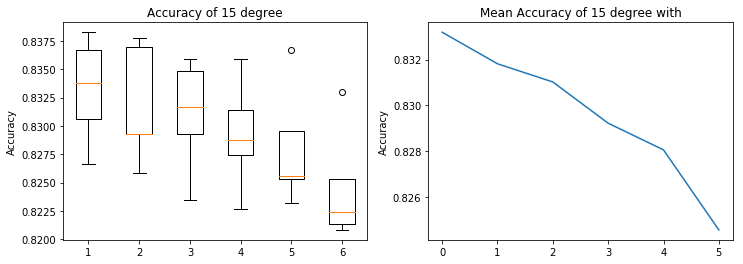

Number of remaining samples before start cross val : 18922
Proportion of Bosons in all train set : 30.11309586724448 %
Proportion of Bosons in test fold 1: 30.2061310782241 %


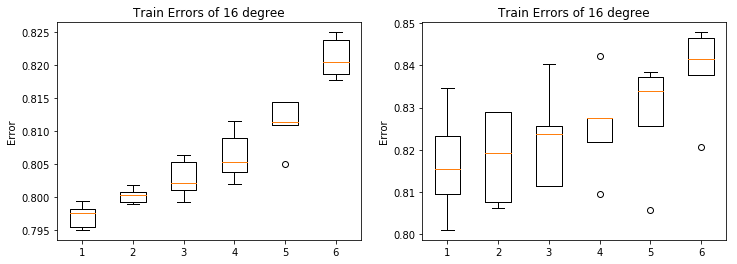

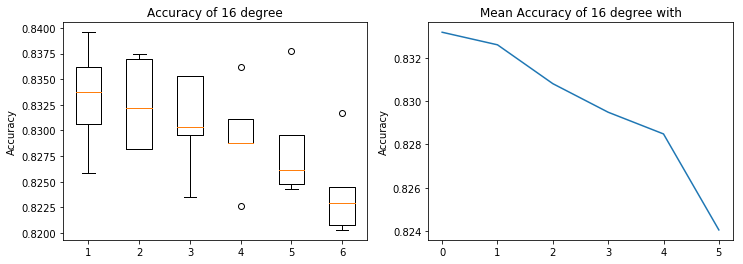

In [7]:
_, _, _, ss_tX_outliers_nocorrfeat, _ = remove_correlated_feat(ss0_tX_outliers, ss1_tX_outliers, ss2_tX_outliers, ss3_tX_outliers, labels_feat)
lambdas = np.logspace(-10, -5, 6)
degrees = np.linspace(8,16,9, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX_outliers_nocorrfeat, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'rr',hyperparams=[lambdas])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)

In [9]:
np.logspace(-12, -7, 6)[1]

1e-11